In [1]:
import sys
import json
import os
import numpy as np
import tensorflow as tf

from model.assembler import get_model_logits
from model import train_ops
from model import summary_ops
import data.ops

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('dark')
sns.set_context('poster')
%matplotlib inline

proto_path = 'small_resnet.json'
proto_name = os.path.splitext(proto_path)[0]
proto_name = os.path.basename(proto_name)

In [2]:
EPOCHS = 1000
BATCH_SIZE = 8
TRAIN_STEPS = (EPOCHS * 8525) // BATCH_SIZE

# proto_path = argv[-1]
proto_path = 'proto/smallkernel_less_features.json'
proto_name = os.path.splitext(proto_path)[0]
proto_name = os.path.basename(proto_name)

tf.reset_default_graph()
network_params = json.load(open(proto_path))
bsize = tf.placeholder_with_default(BATCH_SIZE, [], 'batch_size')
input_op, seq_len, label_op = data.ops.get_batch_producer(
    './data/TFRecords/aug_train.TFRecord', bsize)

# for debug!!!
summary_ops.add_label_hist(label_op)
logits = get_model_logits(seq_len, input_op, **network_params)

t_ops = train_ops.get_trainer(label_op, logits)
step, train, loss, conf, acc, lrate = t_ops

tf.summary.histogram('sample_diversity', label_op)
s_op = summary_ops.get_all_summaries(*t_ops)

Tensor("var_features/FCN_block_0/Conv0/conv1d/Squeeze:0", shape=(?, ?, 4), dtype=float32)
Tensor("var_features/FCN_block_0/Conv1/conv1d/Squeeze:0", shape=(?, ?, 4), dtype=float32)
Tensor("var_features/FCN_block_0/Conv2/conv1d/Squeeze:0", shape=(?, ?, 4), dtype=float32)

Tensor("var_features/FCN_block_1/Conv0/conv1d/Squeeze:0", shape=(?, ?, 4), dtype=float32)
Tensor("var_features/FCN_block_1/Conv1/conv1d/Squeeze:0", shape=(?, ?, 4), dtype=float32)

Tensor("var_features/FCN_block_2/Conv0/conv1d/Squeeze:0", shape=(?, ?, 4), dtype=float32)
Tensor("var_features/FCN_block_2/Conv1/conv1d/Squeeze:0", shape=(?, ?, 4), dtype=float32)

Tensor("var_features/FCN_block_3/Conv0/conv1d/Squeeze:0", shape=(?, ?, 8), dtype=float32)
Tensor("var_features/FCN_block_3/Conv1/conv1d/Squeeze:0", shape=(?, ?, 8), dtype=float32)

Tensor("var_features/FCN_block_4/Conv0/conv1d/Squeeze:0", shape=(?, ?, 8), dtype=float32)
Tensor("var_features/FCN_block_4/Conv1/conv1d/Squeeze:0", shape=(?, ?, 8), dtype=float32)

Tenso

In [3]:
tf.get_collection('moving_average_stat')
tf.cast()


[<tf.Variable 'averages/evaluation/accuracy_eval/accuracy/ema:0' shape=() dtype=float32_ref>,
 <tf.Variable 'averages/evaluation/total_loss/ema:0' shape=() dtype=float32_ref>,
 <tf.Variable 'averages/evaluation/l2_loss_all/ema:0' shape=() dtype=float32_ref>,
 <tf.Variable 'averages/evaluation/train_loss/ema:0' shape=() dtype=float32_ref>]

In [ ]:
tf.train.ExponentialMovingAverage
tf.train.exponential_decay

# Supervised training

In [7]:
tf.GraphKeys.UPDATE_OPS

'update_ops'

In [ ]:
tf.contrib.opt.LazyAdamOptimizer.apply_gradients

In [64]:
graph = tf.get_default_graph()
graph.get_tensor_by_name('learning_rate_1:0')

<tf.Tensor 'learning_rate_1:0' shape=() dtype=string>

# Misc

In [28]:
tf.trainable_variables()

[<tf.Variable 'classifier/logits/weights:0' shape=(5, 4) dtype=float32_ref>,
 <tf.Variable 'classifier/logits/biases:0' shape=(4,) dtype=float32_ref>]

In [27]:
avg2

{'beta1_power': <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 'beta2_power': <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>,
 'classifier/logits/biases/loss_avg': <tf.Variable 'classifier/logits/biases:0' shape=(4,) dtype=float32_ref>,
 'classifier/logits/biases/variable_avg': <tf.Variable 'classifier/logits/biases/variable_avg:0' shape=(4,) dtype=float32_ref>,
 'classifier/logits/weights/Adam': <tf.Variable 'classifier/logits/weights/Adam:0' shape=(5, 4) dtype=float32_ref>,
 'classifier/logits/weights/Adam_1': <tf.Variable 'classifier/logits/weights/Adam_1:0' shape=(5, 4) dtype=float32_ref>,
 'classifier/logits/weights/loss_avg': <tf.Variable 'classifier/logits/weights:0' shape=(5, 4) dtype=float32_ref>,
 'classifier/logits/weights/variable_avg': <tf.Variable 'classifier/logits/weights/variable_avg:0' shape=(5, 4) dtype=float32_ref>,
 'global_step': <tf.Variable 'global_step:0' shape=() dtype=int32_ref>,
 'loss_aux/classifier/logits/l2_loss/loss_avg': <tf.Variab

In [26]:
avg1

{'beta1_power': <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 'beta2_power': <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>,
 'classifier/logits/biases/variable_avg': <tf.Variable 'classifier/logits/biases:0' shape=(4,) dtype=float32_ref>,
 'classifier/logits/weights/Adam': <tf.Variable 'classifier/logits/weights/Adam:0' shape=(5, 4) dtype=float32_ref>,
 'classifier/logits/weights/Adam_1': <tf.Variable 'classifier/logits/weights/Adam_1:0' shape=(5, 4) dtype=float32_ref>,
 'classifier/logits/weights/variable_avg': <tf.Variable 'classifier/logits/weights:0' shape=(5, 4) dtype=float32_ref>,
 'global_step': <tf.Variable 'global_step:0' shape=() dtype=int32_ref>,
 'loss_aux/classifier/logits/l2_loss/loss_avg': <tf.Variable 'loss_aux/classifier/logits/l2_loss/loss_avg:0' shape=() dtype=float32_ref>,
 'loss_aux/l2_loss_all/loss_avg': <tf.Variable 'loss_aux/l2_loss_all/loss_avg:0' shape=() dtype=float32_ref>,
 'loss_aux/train_loss/loss_avg': <tf.Variable 'loss_aux/train_

In [25]:
avg1['classifier/logits/biases/variable_avg'], avg2['classifier/logits/biases/variable_avg']

(<tf.Variable 'classifier/logits/biases:0' shape=(4,) dtype=float32_ref>,
 <tf.Variable 'classifier/logits/biases/variable_avg:0' shape=(4,) dtype=float32_ref>)

In [23]:
set(avg1.items()).difference(set(avg2.items()))


{('classifier/logits/biases/variable_avg',
  <tf.Variable 'classifier/logits/biases:0' shape=(4,) dtype=float32_ref>),
 ('classifier/logits/weights/variable_avg',
  <tf.Variable 'classifier/logits/weights:0' shape=(5, 4) dtype=float32_ref>)}

In [9]:
#tf.train.ExponentialMovingAverage.apply
tf.moving_average_variables()


{'beta1_power': <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 'beta2_power': <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>,
 'classifier/logits/biases/loss_avg': <tf.Variable 'classifier/logits/biases:0' shape=(4,) dtype=float32_ref>,
 'classifier/logits/biases/variable_avg': <tf.Variable 'classifier/logits/biases/variable_avg:0' shape=(4,) dtype=float32_ref>,
 'classifier/logits/weights/Adam': <tf.Variable 'classifier/logits/weights/Adam:0' shape=(5, 4) dtype=float32_ref>,
 'classifier/logits/weights/Adam_1': <tf.Variable 'classifier/logits/weights/Adam_1:0' shape=(5, 4) dtype=float32_ref>,
 'classifier/logits/weights/loss_avg': <tf.Variable 'classifier/logits/weights:0' shape=(5, 4) dtype=float32_ref>,
 'classifier/logits/weights/variable_avg': <tf.Variable 'classifier/logits/weights/variable_avg:0' shape=(5, 4) dtype=float32_ref>,
 'global_step': <tf.Variable 'global_step:0' shape=() dtype=int32_ref>,
 'loss_aux/classifier/logits/l2_loss/loss_avg': <tf.Variab

In [4]:
_1 = summary_ops.get_general_summaries(loss, acc, lrate, conf)
_2 = summary_ops.get_variables_histogram(loss)
_3 = summary_ops.get_label_hist(label_op)


# Using tf.Supervisor

In [ ]:
sv = tf.train.Supervisor()

# Miscallenous

In [ ]:
graph = tf.get_default_graph()
res_out = graph.get_tensor_by_name('CNN_block_1/Conv3/Conv_dim8_ker16_pool1/Relu:0')

In [ ]:
#sns.heatmap(res[1])
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    res = sess.run(res_out, {input_op:np.random.randn(1000, 100)})
#df = pd.DataFrame(res, columns=['Normal', 'Fibrill', 'Other', 'Noise'])
#df.plot.kde()
plt.plot(res.squeeze()[..., 0])

In [19]:
res.shape

(1000, 33, 1, 8)

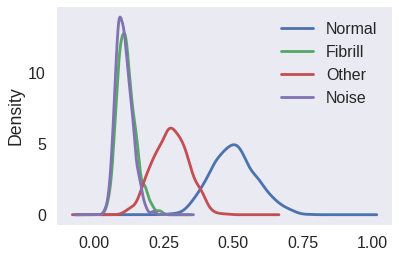

In [16]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    #res = sess.run(res_out, {input_op:np.random.randn(1000, 100)})
df = pd.DataFrame(res[1], columns=['Normal', 'Fibrill', 'Other', 'Noise'])
df.plot.kde()

In [8]:
x = tf.placeholder(1, [None, None, 1, None])
def divide_x(x, N):
    with tf.name_scope('sample_division'):
        x_shape = tf.shape(x)
        batch_size, seq_len = x_shape[0], x_shape[1]
        # Make sure sequence can be divided to equal parts
        padding = [[0,0],[0, N-seq_len%N],[0,0], [0,0]]
        x_pad = tf.pad(x, padding, 'SYMMETRIC')
        
        # Don't pad if not necessary, i.e. seq_len%N == 0
        x = tf.cond(tf.equal(seq_len%N, 0), lambda: x, lambda: x_pad)
        seq_len = tf.shape(x)[1]
        div_x = tf.reshape(x, [batch_size, N, seq_len//N, x_shape[-1]])
        return div_x

div_x = divide_x(x, 10)

In [9]:
dim = x.shape[2]
dim.value

1

In [10]:
with tf.Session() as sess:
    res = div_x.eval({x:np.arange(1000*91).reshape(1000, 91, 1, 1)})

In [11]:
#res[0, -1, :, 0]
res.shape

(1000, 10, 10, 1)

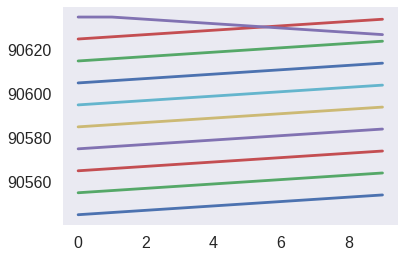

In [12]:
plt.plot(res[-5].squeeze().T)